1. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Készítsünk sorszámozott listát a szálláshelyek adatairól!&nbsp;</span> 

a. A lista legyen a szálláshely típusa szerint, azon belül hely szerint, majd a neve szerint növekvően rendezve! 

b. A számozás típusonként kezdődjön újra!

In [1]:
--szálláshely ab
-- ROW_NUMBER() fv

SELECT ROW_NUMBER() OVER(PARTITION BY tipus
                    ORDER BY tipus, hely, szallas_nev) AS 'Sorszám',
        *
FROM szallashely
--biztosan lesz a zhban: részösszeg, amit ma tanulunk, analitikus/over 

(21 rows affected)

Total execution time: 00:00:00.076

Sorszám,SZALLAS_ID,SZALLAS_NEV,HELY,CSILLAGOK_SZAMA,TIPUS,ROGZITETTE,ROGZ_IDO,CIM
1,7,Szieszta Apartmanház,Balaton-dél,0,Apartman,Mari,2016-03-11,"8630 Balatonboglár, Dózsa György utca 108"
2,18,Fortuna Apartman,Dél-Somogy,0,Apartman,Béla,2016-04-07,"7570 Barcs, Kossuth u. 13."
3,3,Fortuna Apartman,Hajdúbihar megye,0,Apartman,Sára,2016-03-06,"4200 Hajdúszoboszló, Wesselényi utca 56."
1,20,Kollégium,Budapest,0,Diákszálló,Sára,2016-04-07,"1146 Budapest, Ajtósi Dürer sor 23."
1,8,Hotel Három Hattyú,Balaton-dél,4,Hotel,Béla,2016-03-13,"8623 Balatonföldvár, Rákóczi Ferenc út 45."
2,6,Kentaur Hotel,Balaton-dél,3,Hotel,Béla,2016-03-08,"8600 Siófok (Széplak), Akácfa utca 1"
3,12,Gold Hotel,Budapest,3,Hotel,Béla,2016-03-24,"1016 Budapest, Hegyalja út 12"
4,10,Lagúna Hotel,Budapest,4,Hotel,Sára,2016-03-20,"1097 Budapest, Albert Flórián út 3"
5,16,Bagoly Hotel,Pest megye,3,Hotel,Mari,2016-04-01,"2230 Gyömrő, Bergszász u. 5."
6,17,Szarvas Hotel,Tolna megye,4,Hotel,Béla,2016-04-04,"7121 Szálka, Petőfi Sándor u."


2. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Készítsünk lekérdezést, amely a foglalások adatait jeleníti meg!&nbsp;</span> 

a. A lista tartalmazzon két új oszlopot, amelyek az adott ügyfél legrövidebb, illetve leghosszabb foglalásának hosszát (a foglalt napok számát) mutatják meg! 

b. Az oszlopokat nevezzük el értelemszerűen!

```
3. Készítsük listát, amely megjeleníti az ügyfelek azonosítóját, nevét és a foglalásainak kezdő- és befejező dátumát, valamint azt, hogy a foglalás összesen hány főre történt! 
```

a. Egy új oszlopban jelenítsük meg azt is, hogy az ügyfél előző három foglalása összesen hány főre történt!

![](https://moodle.uni-corvinus.hu/theme/image.php/adaptable/atto_h5p/1709548862/icon)

In [2]:
-- SUM() és ROWS BETWEEN ... vagy LAG()
SELECT v.USERNEV,
        v.NEV,
        f.METTOL,
        f.MEDDIG,
        f.FELNOTT_SZAM + f.GYERMEK_SZAM,
        -- előző 3 foglalás összesen
        SUM(f.FELNOTT_SZAM + f.GYERMEK_SZAM) 
            OVER(PARTITION BY f.UGYFEL_FK
                ORDER BY f.METTOL
                ROWS BETWEEN 3 preceding AND 1 preceding) AS 'Előző 3 összesen'
FROM Foglalas f JOIN Vendeg v ON f.UGYFEL_FK = v.USERNEV

(1027 rows affected)

Total execution time: 00:00:00.106

USERNEV,NEV,METTOL,MEDDIG,(No column name),Előző 3 összesen
adam1,Kiss Ádám,2016-05-28,2016-06-03,3,NULL
adam1,Kiss Ádám,2016-08-20,2016-08-24,1,3
adam1,Kiss Ádám,2016-10-19,2016-10-24,2,4
adam3,Barkóci Ádám,2016-09-12,2016-09-16,2,NULL
adam3,Barkóci Ádám,2017-02-06,2017-02-10,1,2
adam4,Bieniek Ádám,2016-08-28,2016-08-30,3,NULL
adam4,Bieniek Ádám,2016-10-27,2016-11-02,3,3
adam4,Bieniek Ádám,2016-11-15,2016-11-18,2,6
adam4,Bieniek Ádám,2016-12-06,2016-12-09,3,8
adam4,Bieniek Ádám,2017-01-12,2017-01-19,2,8


4. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Készítsünk listát arról, hogy az egyes szálláshelyeken évente hány foglalás történt!&nbsp;</span> 

a. A lista jelenítse meg a szálláshely azonosítóját, nevét, az évet, és a foglalások számát!

b. Egy új oszlopban jelenítsük meg a szálláshely eddigi éves foglalásainak számát is (az aktuálisat is beleértve). 

c. Az évnél a METTOL dátumot vegyük figyelembe! 

d. A lista ne tartalmazzon duplikált sorokat!

5. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Készítsük listát a szálláshelyekről! A lista tartalmazza a szálláshely azonosítóját, nevét, és a csillagok számát csillagszám szerint csökkenő, azon belül szállásnév szerint növekvő sorrendben!&nbsp;</span> 

a. Vegyünk fel két új oszlopot, amely a sorrend szerint előző szálláshely nevét, illetve azonosítóját is megjeleníti!

6. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Listázzuk azon termékeket, amelyekből az átlagosnál kevesebb van raktáron!&nbsp;</span> 

a. Csak a termék kódja és megnevezése jelenjen meg!

In [3]:
SELECT TERMEKKOD, MEGNEVEZES
FROM Termek
WHERE KESZLET <
    (
        -- átlag kiszámítása
        SELECT AVG(KESZLET)
        FROM Termek
    )

(437 rows affected)

Total execution time: 00:00:00.019

TERMEKKOD,MEGNEVEZES
01010110T,Fotópapír A/4 fényes
01010304T,Öntapadós hologramos papír A/4
01020300T,Oklevél A/4 színes
01030091T,Emléklap A/5
01030092T,Esküvői meghívó
01040307T,Pausz papír A/4
01040502T,Előlap spirálhoz
01080093T,Fax papír 15 m
01080512T,Öntapadó A/4
01080513T,Selyemfényű karton A/4


7. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Listázzuk azon ügyfeleket, akik még nem fizettek bankkártyával!&nbsp;</span> 

a. Csak az ügyfelek neve jelenjen meg!

In [ ]:
-- NOT IN
SELECT NEV
FROM Ugyfel
WHERE [LOGIN] NOT IN
(
    --akik fizettek bankkártyával
    -- select rows from a table or view
    select [LOGIN]
    from Rendeles
    WHERE FIZ_MOD = 'bankkártya'
)

8. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Mennyibe kerül a második legnagyobb listaárú termék?</span>

9. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Melyik raktár(ak)ban van az a termék, amelyből a legnagyobb készlet van?&nbsp;</span> 

a. Csak a raktár(ak) neve jelenjen meg!

In [4]:
select r.raktar_nev
from termek t join raktar r on t.RAKTAR_KOD = r.RAKTAR_KOD 
where t.keszlet =
(
    select max(t2.keszlet)
    from Termek t2
)

(2 rows affected)

Total execution time: 00:00:00.029

raktar_nev
Veresegyházi
Báthory


10. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Melyek azok a termékek, amelyek listaára nagyobb, mint bármelyik olyan terméké, amelynek nevében az Ajándék szó szerepel?&nbsp;</span> 

a. A termékek kódját és nevét is jelenítsük meg!

11. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Melyik hónapokban adtak le az ügyfelek több rendelést, mint januárban?&nbsp;</span> 

a. Elég a hónapok sorszámait megjeleníteni. 

b. A listát rendezzük a hónapok száma szerint növekvő sorrendbe!

12. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Melyek azok a termékek, amelyek listaára az átlagostól max. 20%-kal tér el?&nbsp;</span> 

a. A termék kódját és nevét is jelenítsük meg!

13. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Készítsünk listát (sorszámonként) az egyes rendelések teljes összegéről!&nbsp;</span> 

a. Szűrjünk azon tételekre, ahol ez az érték nagyobb, mint Viktor Éva rendeléseinek teljes összege! 

b. A teljes összeg oszlopot nevezzük el értelemszerűen!

14. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Listázzuk azokat a termékkategóriákat, amelyből 2017 januárban nem történt rendelés!&nbsp;</span> 

a. Elég a kategóriák nevét megjeleníteni!

15. <span style="background-color: rgb(255, 255, 255); color: rgb(0, 0, 0); font-family: &quot;Open Sans&quot;, sans-serif; font-size: 14.44px;">Listázzuk azon rendelési tételeket, amelynek értéke nagyobb, mint a legdrágább termék listaára azon termékek közül, amelyek szülő kategóriája a ruha!</span>

# <span style="font-size: 14px; color: var(--vscode-foreground);"><b>zh minta</b></span>

Kérdezzük le, hogy melyik ügyfél (USERNEV) hány különböző szálláshelyen foglalt!

  

a. A listában azok az ügyfelek <span style="color: #0000ff;">is</span> jelenjenek meg, akiknek még nem volt foglalásuk

  

b. Megfelelően jelölve jelenjen meg a végösszeg <span style="color: #0000ff;">is</span>!

In [9]:
SELECT IIF(GROUPING_ID(v.USERNEV) = 1, 'Végösszeg', v.USERNEV),
        COUNT(DISTINCT szh.SZALLAS_ID)
FROM Vendeg v LEFT JOIN Foglalas f on v.USERNEV = f.UGYFEL_FK
                    JOIN Szoba sz on f.SZOBA_FK = sz.SZOBA_ID
                    JOIN szallashely szh ON sz.SZALLAS_FK = szh.SZALLAS_ID
GROUP BY ROLLUP(v.USERNEV)

(196 rows affected)

Total execution time: 00:00:00.040

(No column name),(No column name)
adam1,2
adam3,2
adam4,5
agnes,4
agnes3,3
AGNESH,5
AGNESK,3
akos,7
aladar,3
alexandra,6


Készítsünk listát, amely megjeleníti a vendégek adatait!

- Egy új oszlopban számoljuk ki a vendég életkorát (években)
- Egy másik új oszlopban határozzuk meg, hogy születési dátum szerint növekvő rendezésnél mennyi az adott ügyfél. az előtte lévő 2 ügyfél és az utána lévő 2 ügyfél átlagos életkora! Az oszlopot nevezzük el értelemszerűen!

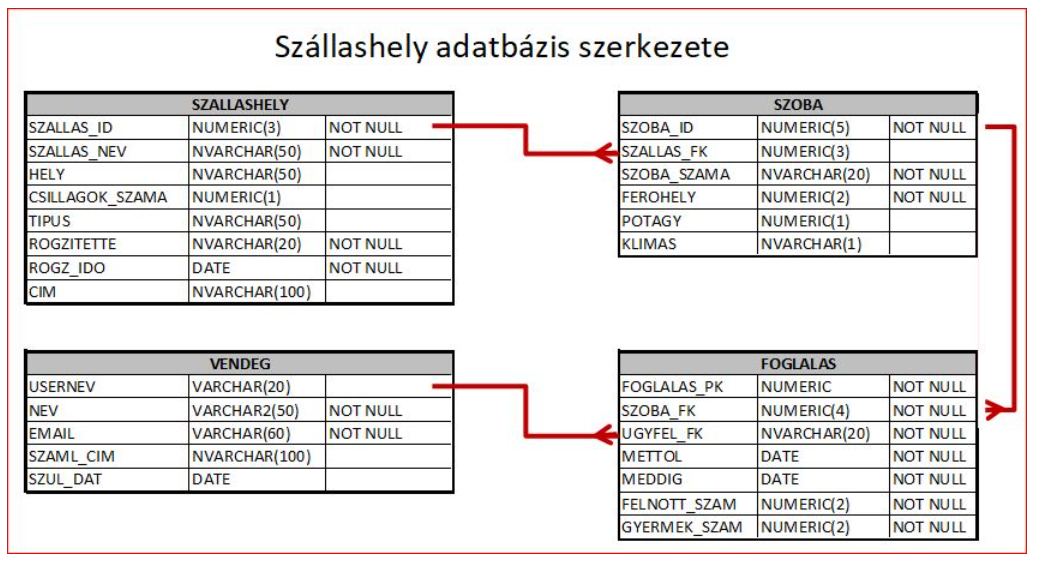

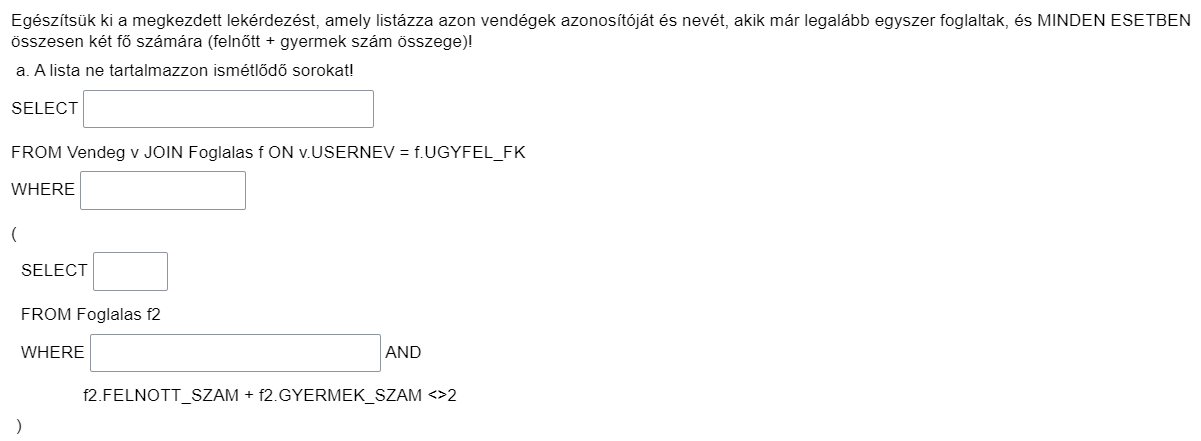

In [11]:
SELECT DISTINCT v.USERNEV,
            v.NEV
FROM Vendeg v JOIN Foglalas f ON v.USERNEV = f.UGYFEL_FK 
WHERE NOT EXISTS 
( 
  SELECT *
  FROM Foglalas f2 
  WHERE f2.UGYFEL_FK = v.USERNEV AND f2.FELNOTT_SZAM + f2.GYERMEK_SZAM <> 2
 )

(10 rows affected)

Total execution time: 00:00:00.034

USERNEV,NEV
MIKLOSB,Balla Miklós
andras4,Back András
ANDRASN,Nagy András
szabolcs,Bodor Szabolcs
jozsef,Gergely József
kristof4,Poprádi Kristóf
tibor2,Dániel Tibor
balu,Endresz Bálint
timea,Papós Tímea
ESZTERE,Érsek Eszter
